In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
import numpy as np


I chose for a dataset of the ACLED which is tracking protests arount the world. They have a special curated dataset on protests realted to the corona pandemic.
exploring this data will hopefully allow me to understand the dynamics of the querdenker moevemnts in Germany and Austra better.

In [5]:
#first i read in the dataset
#data can be found here:https://acleddata.com/curated-data-files/#covid
dfprotets = pd.read_excel(os.path.join('coronavirus_protest.xls'))


In [6]:
# to get an overview of the data:
type(dfprotets)


pandas.core.frame.DataFrame

In [7]:
print(dfprotets.columns)

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP'],
      dtype='object')


First I filter for the Countries Germany and Austria

In [8]:
#filter the data for germany and austria:
filtered_df = dfprotets[dfprotets['COUNTRY'].isin(['Germany', 'Austria'])]


In [9]:
print(filtered_df.head(10))

     EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION   DISORDER_TYPE  \
2605       AUT1621 2023-10-14  2023               1  Demonstrations   
2606       AUT1425 2023-04-15  2023               1  Demonstrations   
2607       AUT1440 2023-04-15  2023               1  Demonstrations   
2608       AUT1324 2023-02-12  2023               1  Demonstrations   
2609       AUT1315 2023-02-07  2023               1  Demonstrations   
2610       AUT1303 2023-01-21  2023               1  Demonstrations   
2611       AUT1278 2023-01-06  2023               1  Demonstrations   
2612       AUT1265 2022-12-04  2022               1  Demonstrations   
2613       AUT1216 2022-10-08  2022               1  Demonstrations   
2614       AUT1180 2022-09-10  2022               1  Demonstrations   

     EVENT_TYPE    SUB_EVENT_TYPE                ACTOR1  \
2605   Protests  Peaceful protest  Protesters (Austria)   
2606   Protests  Peaceful protest  Protesters (Austria)   
2607   Protests  Peaceful protest  Protes

Now,
I want to create several graphs in order to find out more about the data:

1. Graphs which give me better understanding of the actors, such as barcharts showing the count of protests organized by certain actors and an actor network graph
2. a linegraph showing the frequency of protests over time, and also a linegraph showing contextual data to validate the data
3. a map showing the locations of the protests (ideally with the size of the protests)

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\1411041818.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


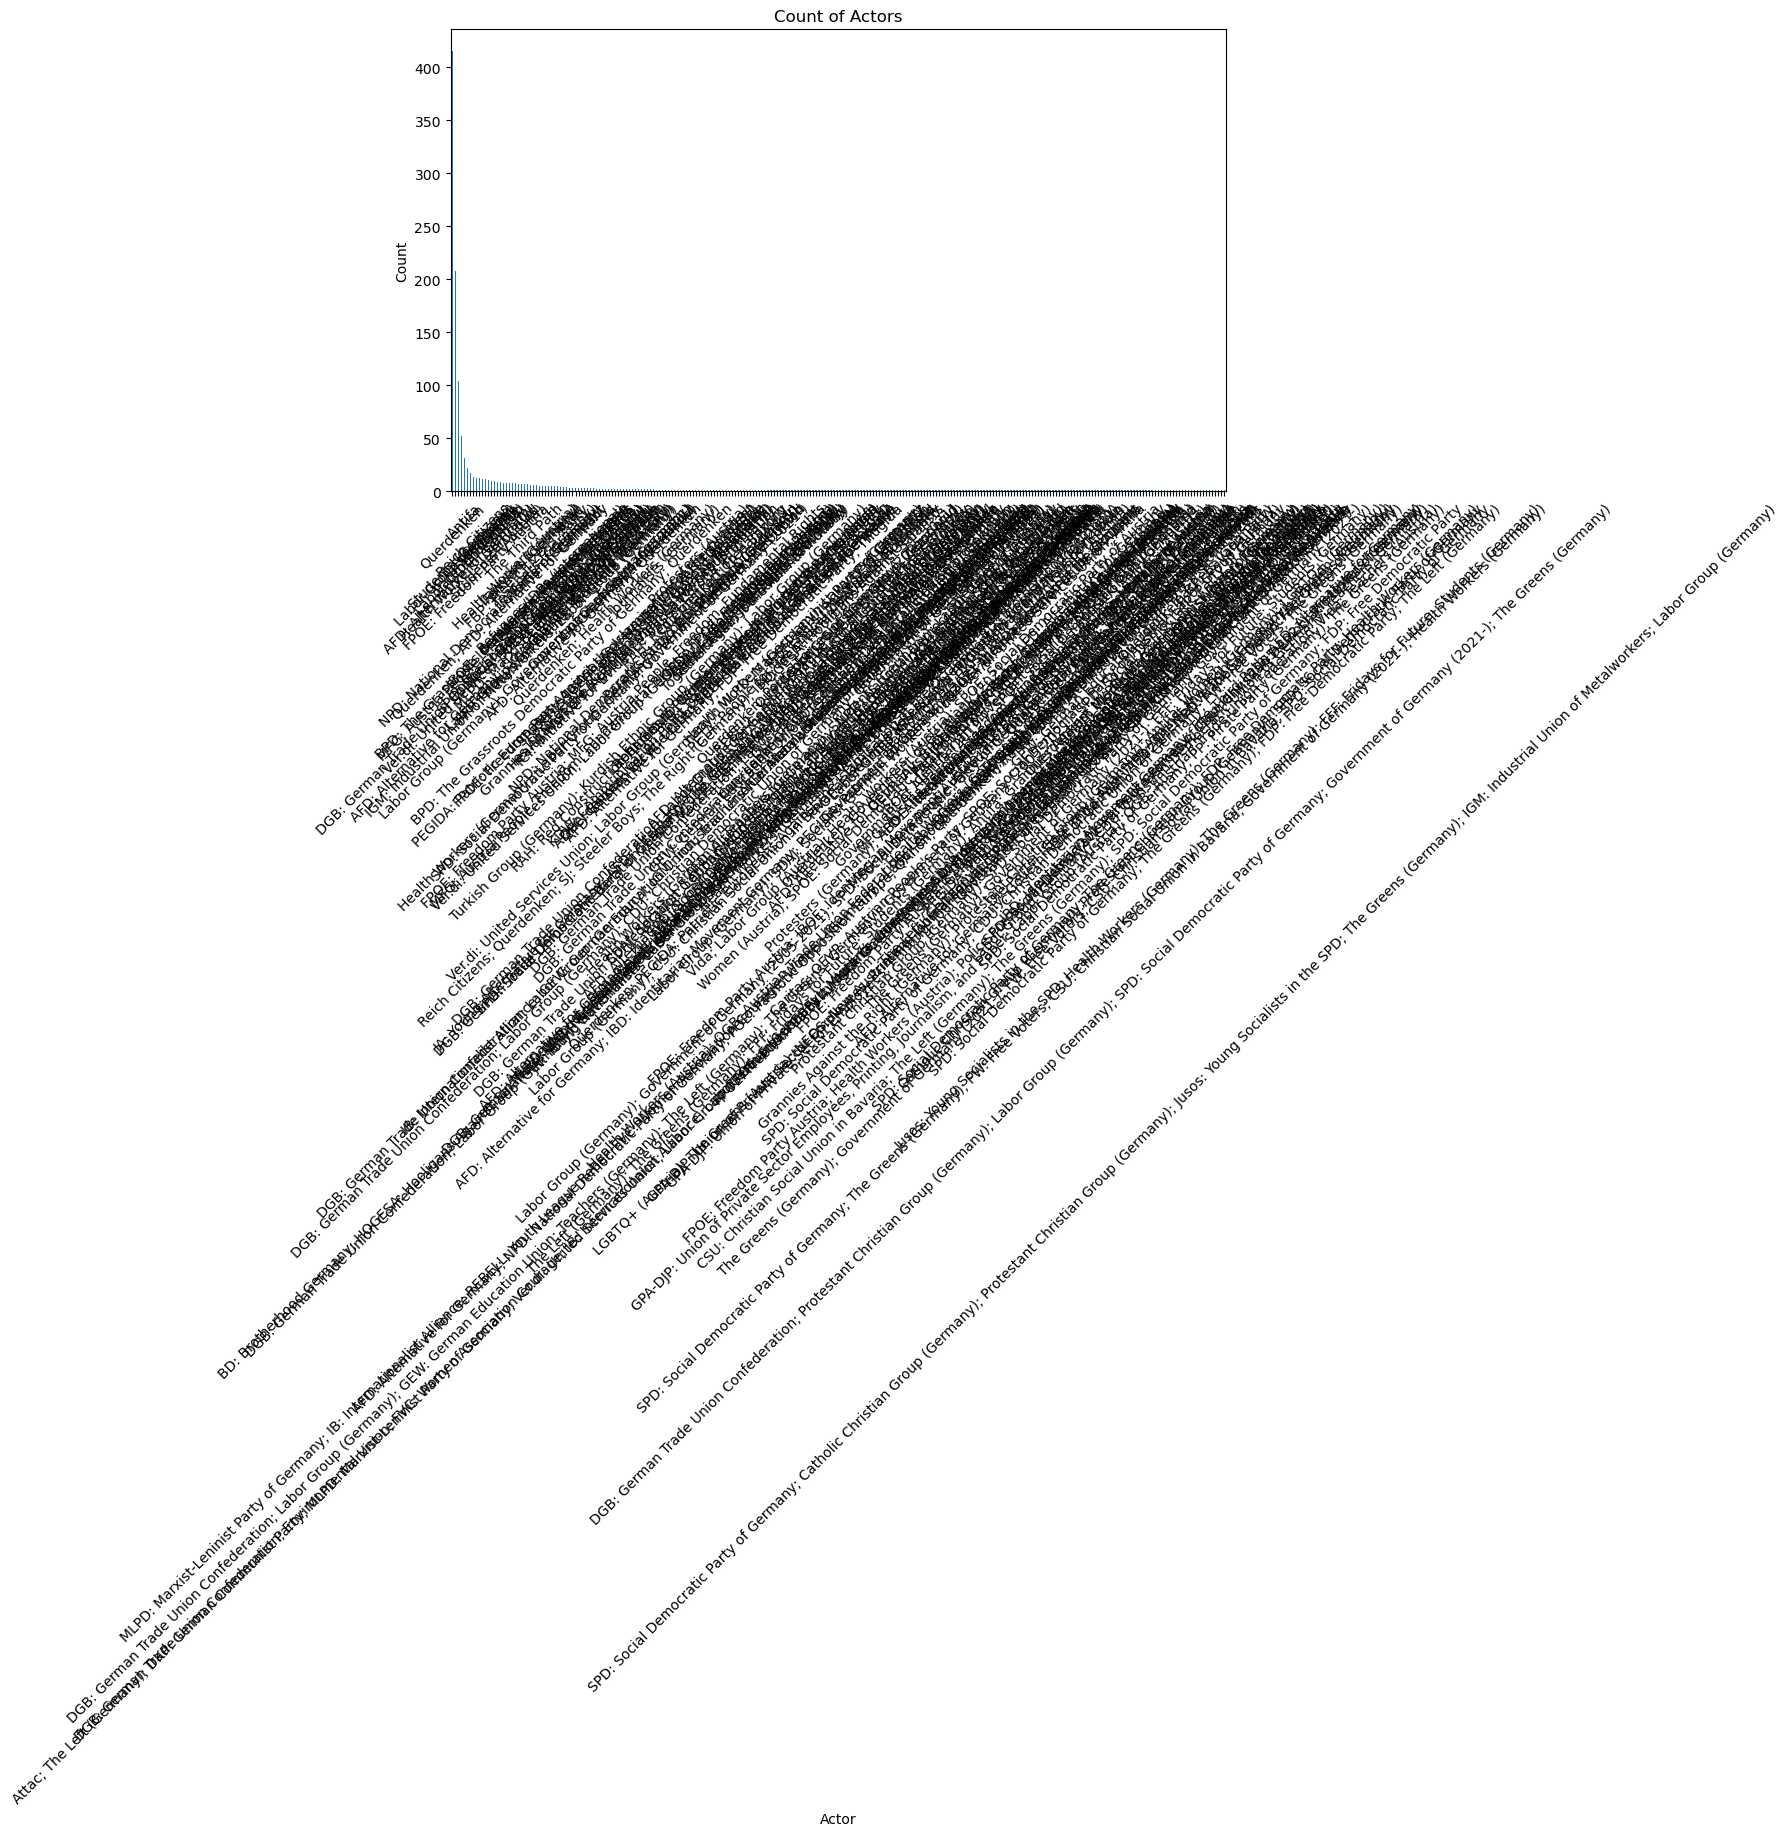

In [10]:
#---------------------------actorplot
actor_counts = filtered_df['ASSOC_ACTOR_1'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
actor_counts.plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Count of Actors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

well... this looks ugly...

So I only plot the top10 Actors

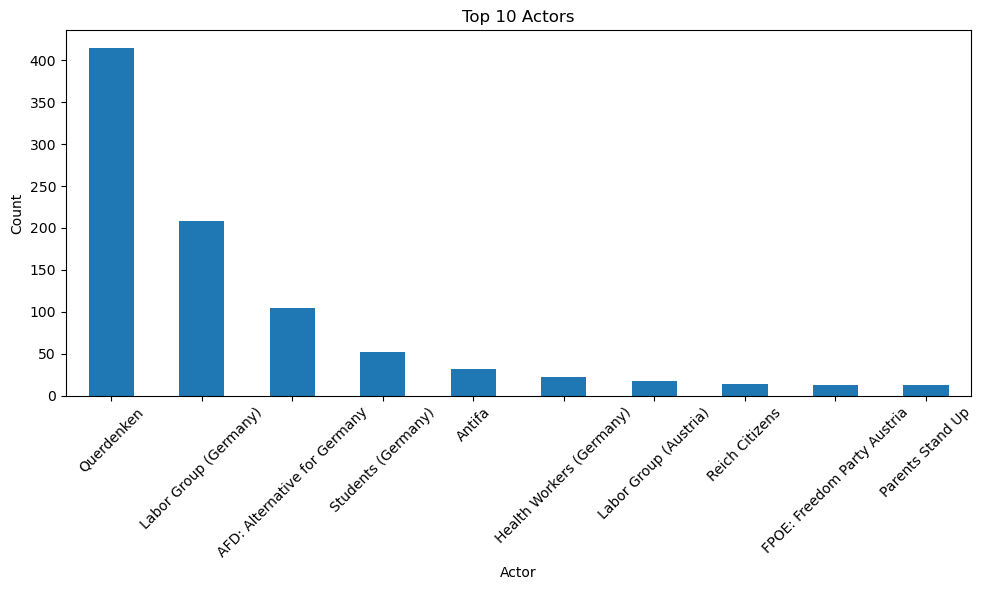

In [11]:
actor_counts = filtered_df['ASSOC_ACTOR_1'].value_counts()

# Selecting the top 10 actors based on their counts
top_10_actors = actor_counts.nlargest(10)

# Plotting the bar chart for the top 10 actors
plt.figure(figsize=(10, 6))
top_10_actors.plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 10 Actors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I feel like I have to sort the actors in categories manually, to only get information about the conspirancy thinkers, because the dataset entails several political groups. To do this, I also need to transform the data in the actors column as one cell entails several actors seperated by a ;. So I will do some network analysis to find out more.

In [12]:
#see who are the actors organizing the protests in Germany and Austria

unique_actors = filtered_df['ASSOC_ACTOR_1'].unique()
print(unique_actors)

['Querdenken' nan 'Labor Group (Austria)'
 'IBOE: Identitarian Movement Austria' 'The Greens (Austria)'
 'Health Workers (Austria); Christian Group (Austria)'
 'GPA-DJP: Union of Private Sector Employees, Printing, Journalism, and Paper; Labor Group (Austria); OGB: Austrian Trade Union Federation'
 'DFO: Democratic Family Party Austria'
 'MFG: Austria People, Freedom, Fundamental Rights; FPOE: Freedom Party Austria'
 "FBP: Free Citizens' Party"
 'FPOE: Freedom Party Austria; MFG: Austria People, Freedom, Fundamental Rights'
 'QAnon' 'Students (Austria)' 'FPOE: Freedom Party Austria'
 'FPOE: Freedom Party Austria; Government of Austria (2019-); MFG: Austria People, Freedom, Fundamental Rights; QAnon'
 'Government of Austria (2019-); SPOE: Social Democratic Party of Austria'
 'MFG: Austria People, Freedom, Fundamental Rights'
 'FPOE: Freedom Party Austria; Government of Austria (2019-)'
 'FPOE: Freedom Party Austria; Government of Austria (2019-); Health Workers (Austria); DAOE: The Alli

In [13]:
#see who are the secondary actors (so the ones doing counter protests)

unique_actors = filtered_df['ASSOC_ACTOR_2'].unique()
print(unique_actors)

[nan 'Antifa' 'Civilians (Austria); Journalists (Austria)'
 'Rioters (Austria)' 'SJOE: Socialist Youth Austria; Students (Austria)'
 'Journalists (Austria)' 'Antifa; Police Forces of Austria (2019-)'
 'Die Partei (Austria)' 'Rioters (Austria); Antifa'
 'Antifa; Civilians (Austria); Journalists (Austria)'
 'Grannies Against the Right (Germany); Women (Germany)'
 'Left Youth Solid'
 'Grannies Against the Right (Germany); Women (Germany); Antifa'
 'Students (Germany)'
 'Protesters (Germany); Alliance Against the Right; DGB: German Trade Union Confederation; Labor Group (Germany); Antifa'
 'Students (Germany); Students (International); Protesters (International)'
 'The Left (Germany); The Greens (Germany)'
 'SPD: Social Democratic Party of Germany; CDU: Christian Democratic Union of Germany; The Greens (Germany); FDP: Free Democratic Party; The Left (Germany); PP: Pirate Party (Germany); FW: Free Voters'
 'Querdenken' 'Russian Group (Germany); Ukrainian Group (Germany); Antifa'
 'Journalis

In [14]:
#I want to get out all unique actors:
from collections import Counter
# Combine actors from both columns
all_actors = filtered_df['ASSOC_ACTOR_1'].fillna('') + ';' + filtered_df['ASSOC_ACTOR_2'].fillna('')

# Split actors using ';' and flatten the list, while ignoring NaN values
all_actors_list = [actor.strip() for actors in all_actors.str.split(';') if isinstance(actors, list) for actor in actors]

# Get unique actors
unique_actors = list(set(all_actors_list))

# Count the frequency of each actor
actor_counts = Counter(all_actors_list)

# Sort actors by frequency in descending order
sorted_actors = sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)

# Print or use the actor counts as needed
for actor, count in sorted_actors:
    print(f'{actor}: {count} times')

: 10452 times
Querdenken: 474 times
Labor Group (Germany): 314 times
AFD: Alternative for Germany: 150 times
Antifa: 112 times
Students (Germany): 88 times
SPD: Social Democratic Party of Germany: 84 times
The Greens (Germany): 74 times
Government of Germany (2021-): 67 times
Health Workers (Germany): 58 times
Women (Germany): 46 times
DGB: German Trade Union Confederation: 36 times
The Left (Germany): 36 times
Grannies Against the Right (Germany): 33 times
Labor Group (Austria): 29 times
Protesters (Germany): 29 times
FPOE: Freedom Party Austria: 28 times
Reich Citizens: 28 times
Die Partei (Germany): 27 times
Journalists (Germany): 23 times
CDU: Christian Democratic Union of Germany: 22 times
Ver.di: United Services Union: 22 times
Alliance Against the Right: 21 times
NPD: National Democratic Party of Germany: 21 times
Health Workers (Austria): 19 times
Government of Germany (2005-2021): 19 times
FDP: Free Democratic Party: 18 times
MLPD: Marxist-Leninist Party of Germany: 18 times
T

From this Analysis, I create a Qualiative list of actors, i consider as being part of the "querdenker mevement" and allies:

Querdenken: 474 times
AFD: Alternative for Germany: 150 times
FPOE: Freedom Party Austria: 28 times
Reich Citizens: 28 times
NPD: National Democratic Party of Germany: 21 times
MFG: Austria People, Freedom, Fundamental Rights: 16 times
The Third Path: 16 times
Free Saxony: 15 times
Parents Stand Up: 15 times
BPD: The Grassroots Democratic Party of Germany: 13 times
IBOE: Identitarian Movement Austria: 11 times
FW: Free Voters: 9 times
PEGIDA: Patriotic Europeans Against the Islamisation of the Occident: 8 times
FBP: Free Citizens' Party: 7 times
OEVP: Austrian People's Party: 6 times
The Right (Germany): 6 times
IBD: Identitarian Movement Germany: 5 times
QAnon: 4 times
JA: Young Alternative for Germany: 4 times
Campact: 4 times
Resistance 2020: 4 times
KDW: Communication Point Democratic Resistance: 3 times
POE: Patriotic Opposition Europe: 3 times
Pro Chemnitz: 3 times
ICI: Initiative for Evidence-based Corona Information: 2 times
JN: Young Nationalists: 1 times

In [15]:
# Define the actors that i defined as quedernker and allies in a list
right_actors = [
    'Querdenken', 'AFD: Alternative for Germany', 'FPOE: Freedom Party Austria',
    'Reich Citizens', 'NPD: National Democratic Party of Germany', 'MFG: Austria People, Freedom, Fundamental Rights',
    'The Third Path', 'Free Saxony', 'Parents Stand Up', 'BPD: The Grassroots Democratic Party of Germany',
    'IBOE: Identitarian Movement Austria', 'FW: Free Voters', 'PEGIDA: Patriotic Europeans Against the Islamisation of the Occident',
    'FBP: Free Citizens\' Party', 'OEVP: Austrian People\'s Party', 'The Right (Germany)', 'IBD: Identitarian Movement Germany',
    'QAnon', 'JA: Young Alternative for Germany', 'Campact', 'Resistance 2020',
    'KDW: Communication Point Democratic Resistance', 'POE: Patriotic Opposition Europe',
    'Pro Chemnitz', 'ICI: Initiative for Evidence-based Corona Information', 'JN: Young Nationalists'
]


Now i will do some network graphs in order to do network analysis

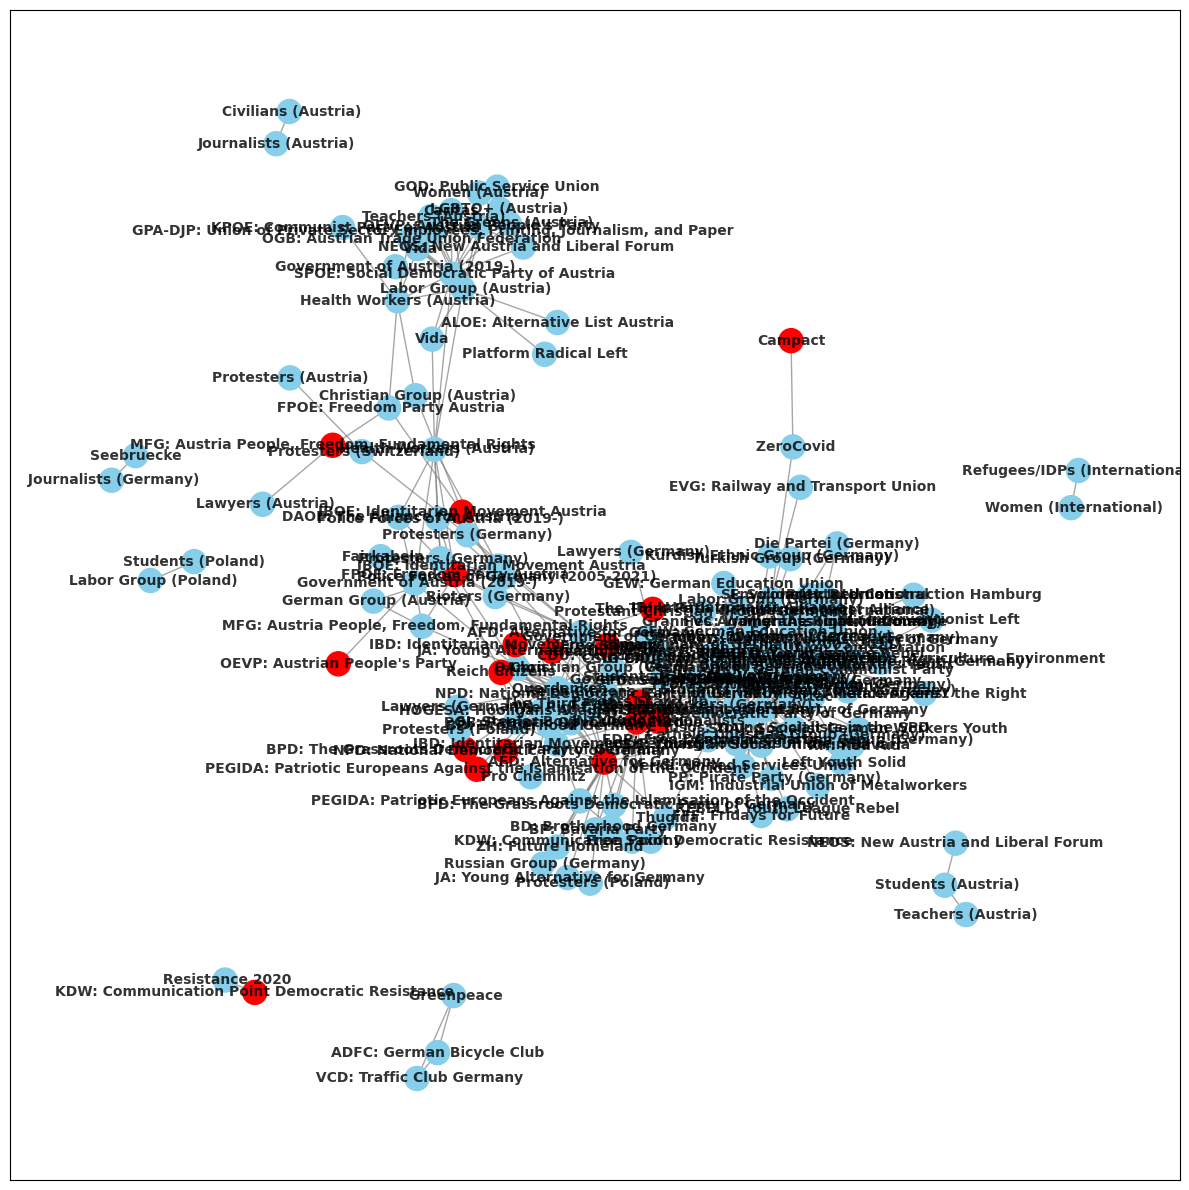

In [16]:
#i want to create a networkgraph using the package networkx

import networkx as nx

# get actors from column
all_actors = (filtered_df['ASSOC_ACTOR_1'].fillna('')).str.strip()
all_actors_list = [actors.split(';') for actors in all_actors]

# Create a graph
G = nx.Graph()


# Add edges between non-empty actors in the same row (excluding self-links)
for actors in all_actors_list:
    non_empty_actors = [actor for actor in actors if actor.strip()]  # Exclude empty spaces
    G.add_edges_from((actor1, actor2) for actor1 in non_empty_actors for actor2 in non_empty_actors if actor1 != actor2)

# Calculate the edge widths based on co-occurrence frequency
edge_widths = {(actor1, actor2): freq for (actor1, actor2, freq) in nx.get_edge_attributes(G, 'weight').items()}

# Choose a force-directed layout
pos = nx.spring_layout(G, seed=42, k=0.3, iterations=100)

# Increase the figure size
plt.figure(figsize=(12, 12))

# Draw the graph with nodes marked in red if there are part of my pre-defined list and variable edge widths
node_colors = ['red' if node in right_actors else 'skyblue' for node in G.nodes]
edges = G.edges()
weights = [edge_widths[edge] if edge in edge_widths else 1 for edge in edges]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold', alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='gray', alpha=0.7)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

For better interpretability i only want to look at the querdenker actors and their connections:

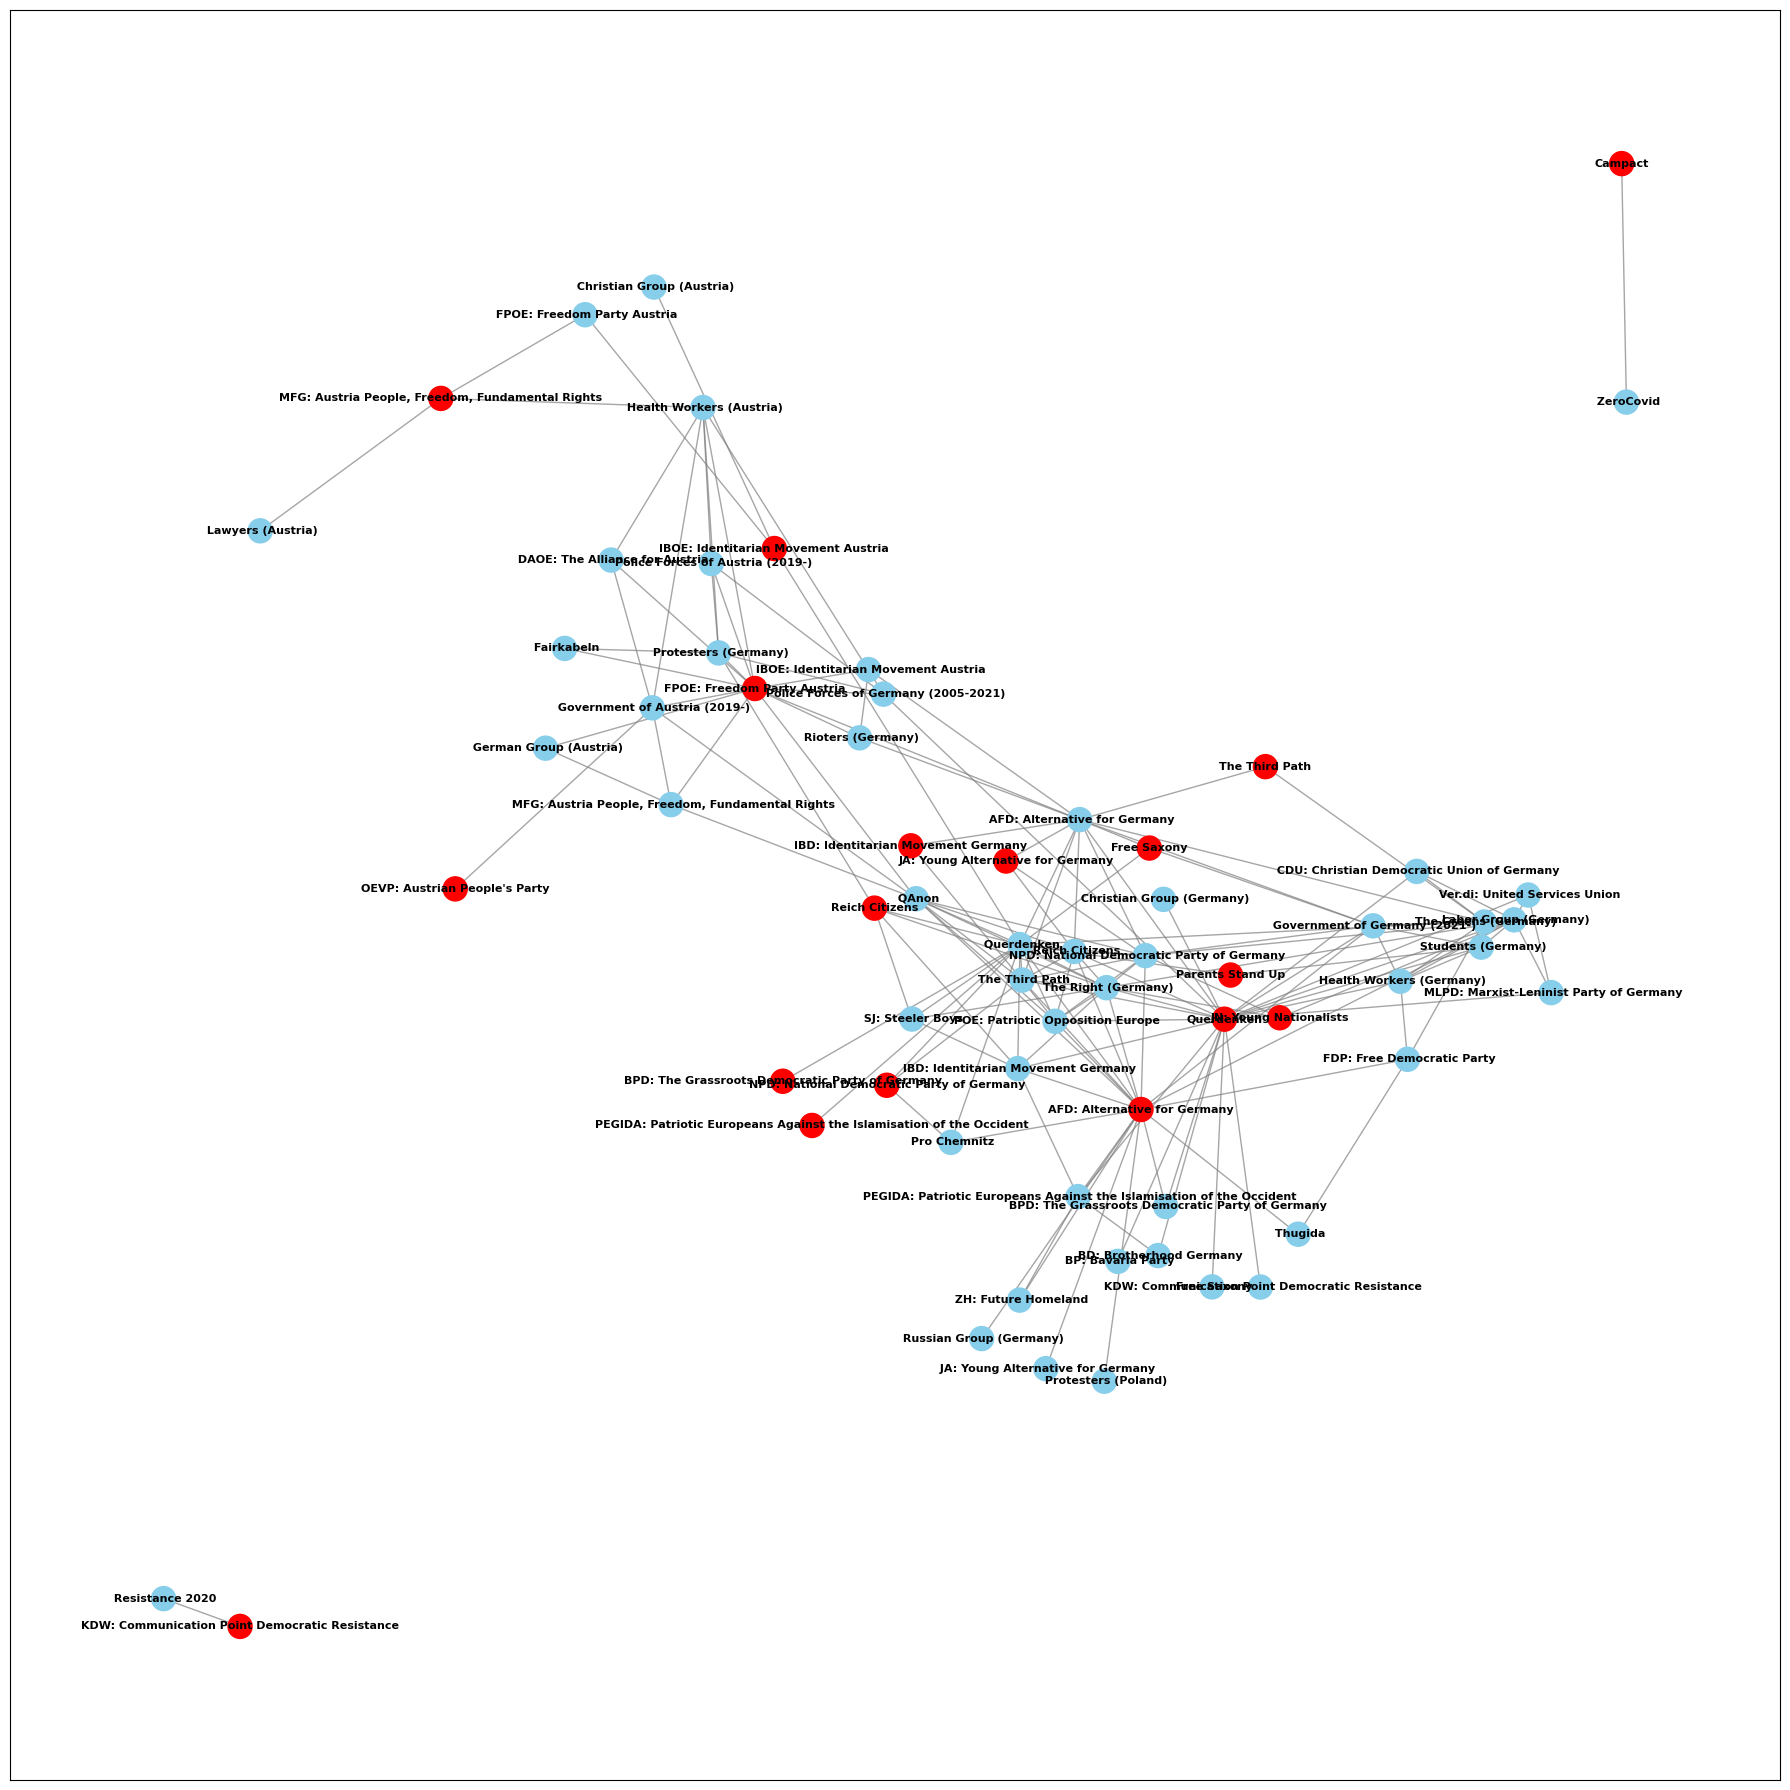

In [17]:

# Identify red nodes
red_nodes = [node for node in G.nodes if node in right_actors]

# Create a subgraph with red nodes and their directly connected blue nodes
subgraph_nodes = red_nodes + [neighbor for red_node in red_nodes for neighbor in G.neighbors(red_node) if neighbor not in red_nodes]
subgraph = G.subgraph(subgraph_nodes)

# Increase the figure size
plt.figure(figsize=(18, 18))

# Draw the subgraph with all nodes labeled and variable edge widths
node_colors = ['red' if node in right_actors else 'skyblue' for node in subgraph.nodes]
edges = subgraph.edges()
weights = [edge_widths[edge] if edge in edge_widths else 1 for edge in edges]
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=300)
nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='black', font_weight='bold')
nx.draw_networkx_edges(subgraph, pos, edgelist=edges, width=weights, edge_color='gray', alpha=0.7)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Analysis: as the newtork graphs proves, there are many more actors connected to the querdenker scene as defined previously by hand. Interesting is also, that "unexpected" actors are part of the network. Apparently the CDU did organise a protest with the "Third Path", Also FDP, Students (Germany), Verd:i, and Health Workers are unexpected collaborating actors.


Now, I wanna have a look at the connections between austrian and german actors

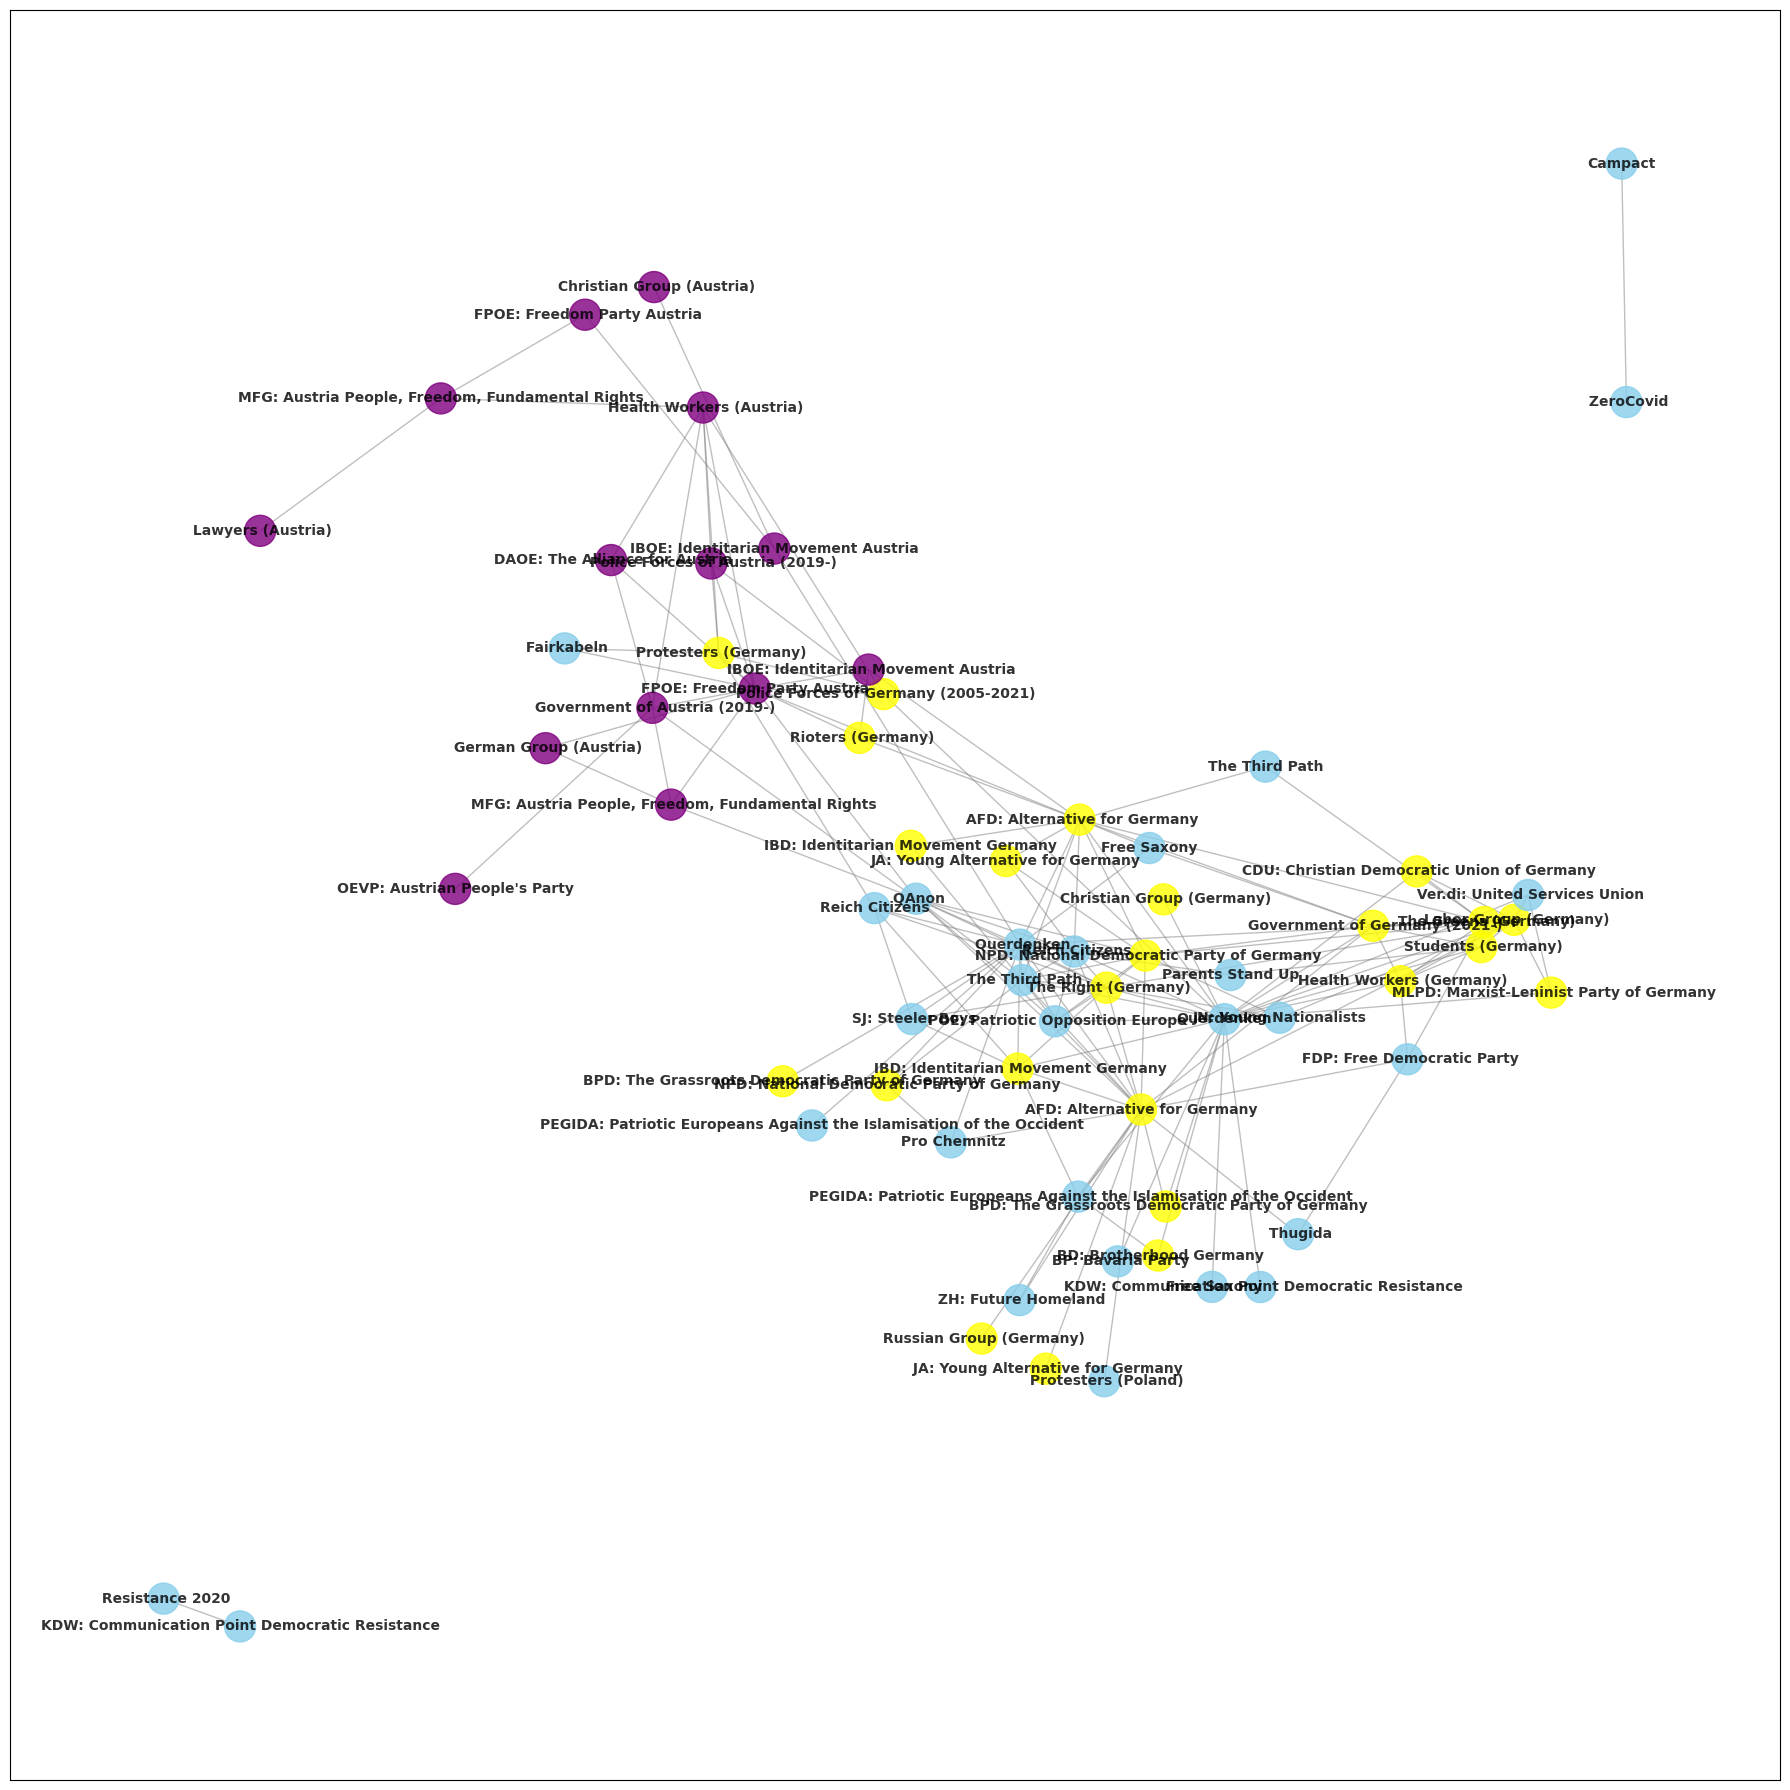

In [18]:

# Determine node colors based on actor names
node_colors = []
for node in subgraph.nodes:
    if 'Austria' in node:
        node_colors.append('purple')
    elif 'Germany' in node:
        node_colors.append('yellow')
    else:
        node_colors.append('skyblue')

# Increase the figure size
plt.figure(figsize=(18, 18))

# Draw the subgraph with all nodes labeled and variable edge widths
edges = subgraph.edges()
weights = [edge_widths[edge] if edge in edge_widths else 1 for edge in edges]
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black', font_weight='bold', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, edgelist=edges, width=weights, edge_color='gray', alpha=0.5)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

We can see, that there were demonstrations collaborativelely organised by Austrian and German actors. Most important connecting actors are AFD and FPÖ. But apparently there were also German protesters and Rioters present in Austrian demonstrations.


Now i want to look at the "Querdenken" actor in particular and create a network around them

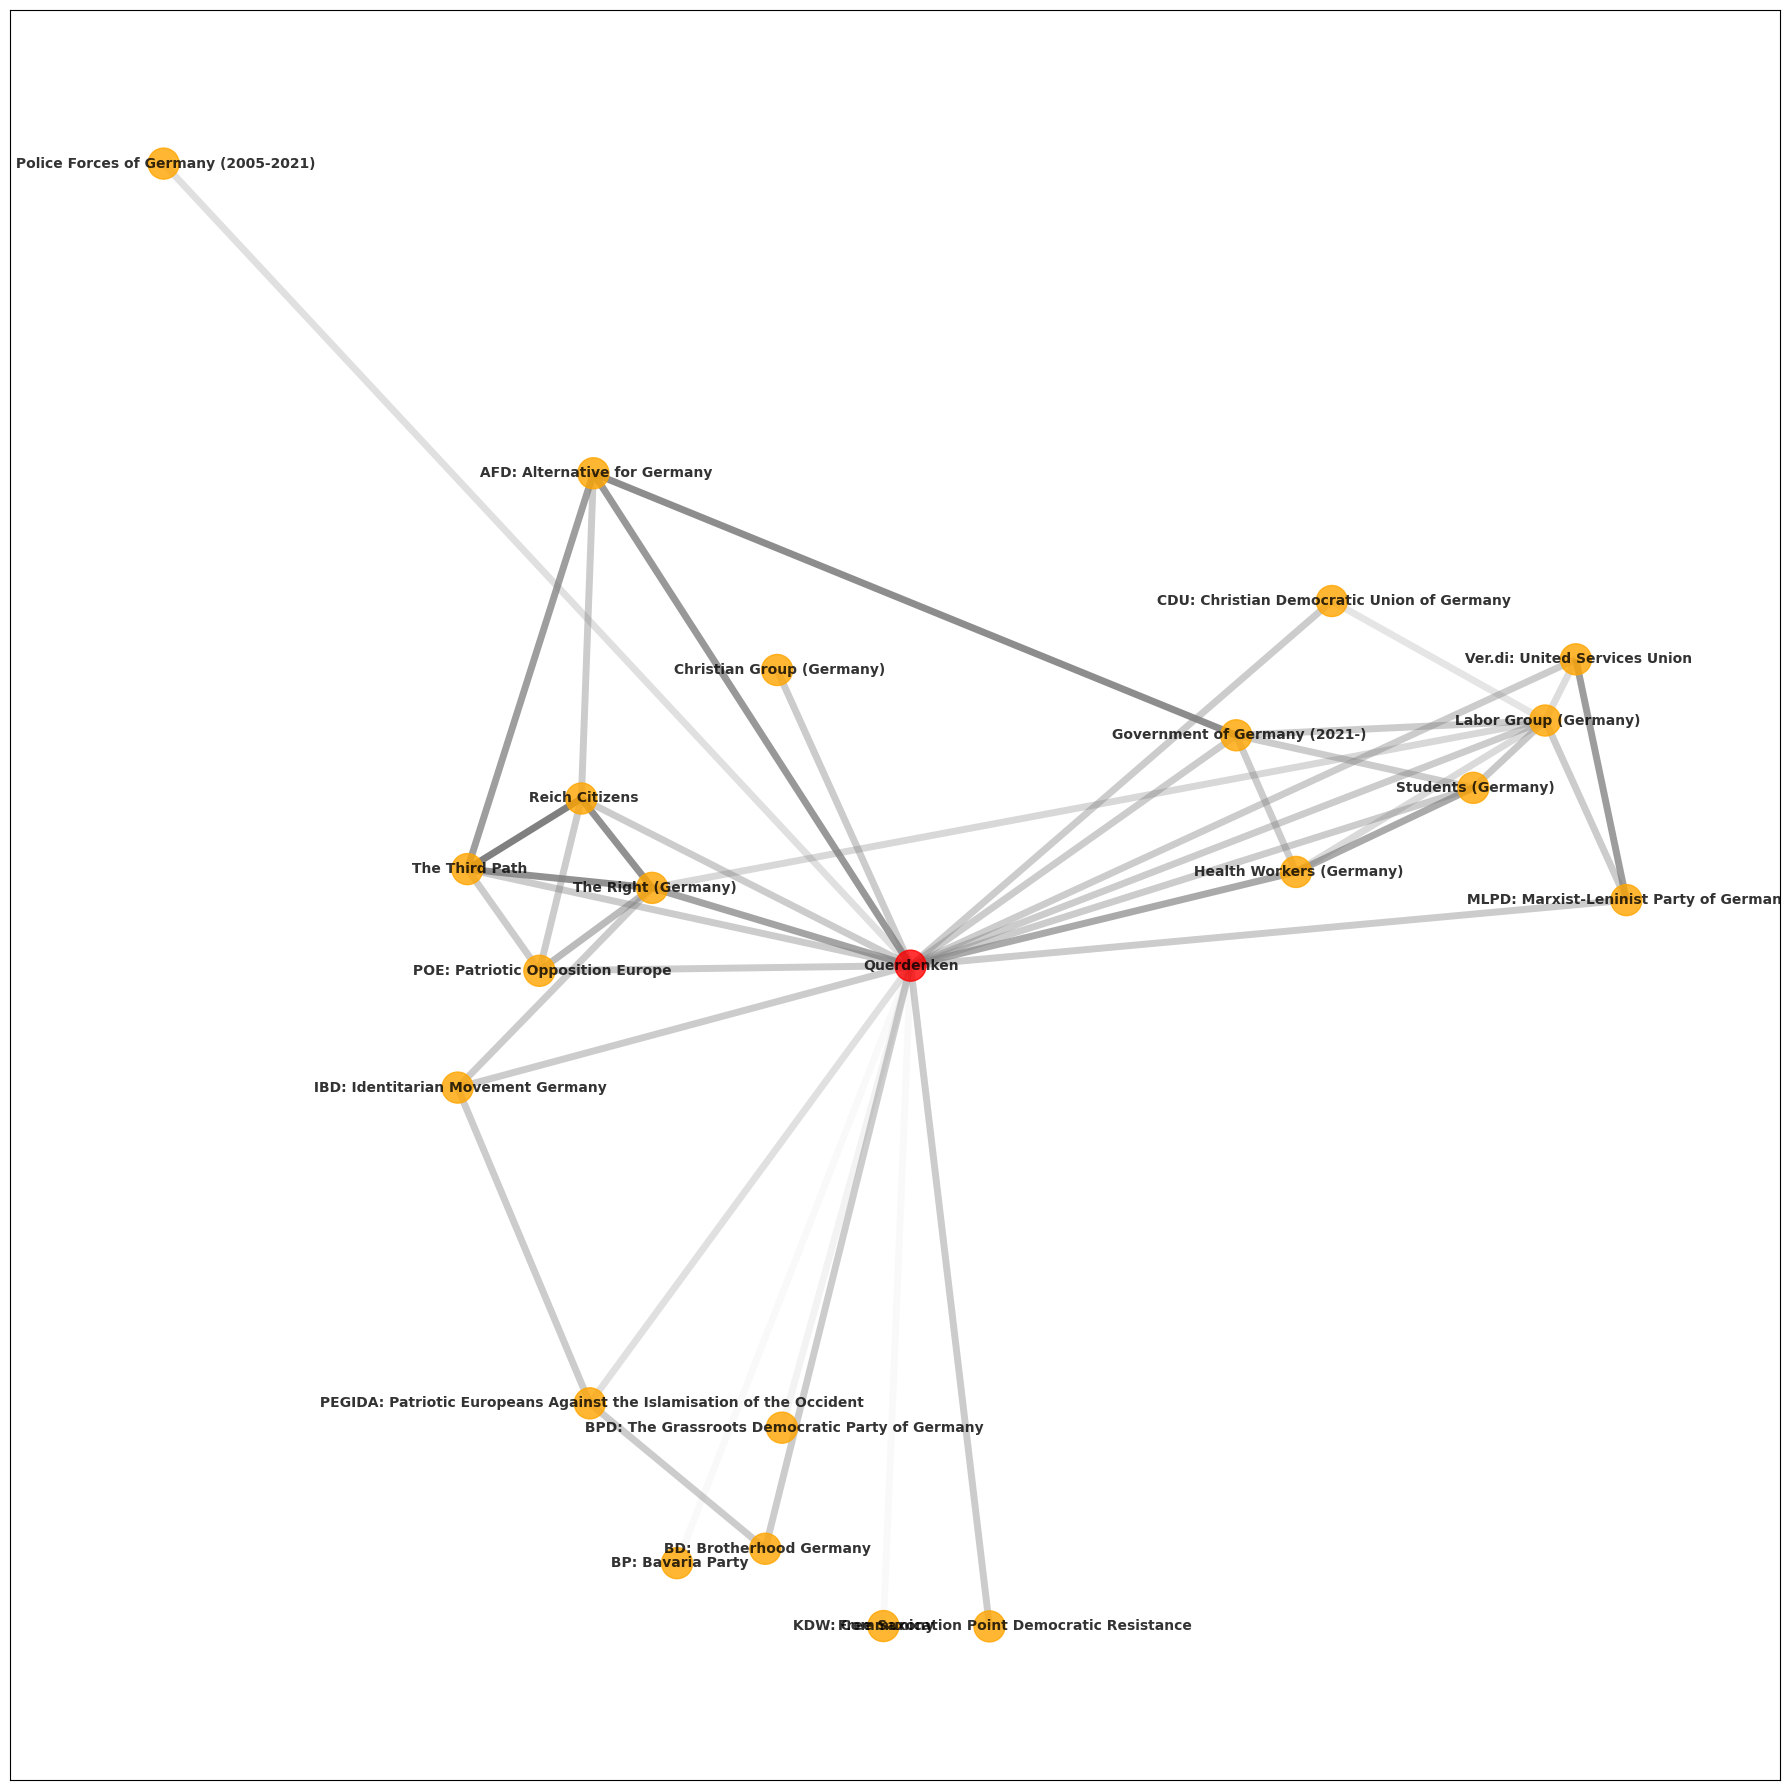

In [19]:
# Create a graph
G = nx.Graph()

# Add edges between non-empty actors in the same row (excluding self-links)
for actors in all_actors_list:
    non_empty_actors = [actor for actor in actors if actor.strip()]  # Exclude empty spaces
    G.add_edges_from((actor1, actor2) for actor1 in non_empty_actors for actor2 in non_empty_actors if actor1 != actor2)

# Calculate the edge opacities based on co-occurrence strength
edge_opacities = {(actor1, actor2): min(G.degree(actor1), G.degree(actor2)) / max(G.degree(actor1), G.degree(actor2)) for (actor1, actor2) in G.edges()}

# Choose a force-directed layout
pos = nx.spring_layout(G, seed=42, k=0.3, iterations=100)

# Identify the central actor
central_actor = 'Querdenken'

# Find actors with co-occurrence more than 0
cooccurrence_threshold = 0
cooccurrence_actors = [actor for actor in G.neighbors(central_actor) if G.degree(actor) > cooccurrence_threshold]

# Create a subgraph with the central actor and actors with co-occurrence more than 0
subgraph_nodes_2 = [central_actor] + cooccurrence_actors
subgraph_2 = G.subgraph(subgraph_nodes_2)

# Increase the figure size
plt.figure(figsize=(18, 18))

# Draw the subgraph with all nodes labeled and variable edge opacities
node_colors = ['red' if node == central_actor else 'orange' for node in subgraph_2.nodes]
edges = subgraph_2.edges()
opacities = [edge_opacities[edge] if edge in edge_opacities else 0.4 for edge in edges]
nx.draw_networkx_nodes(subgraph_2, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_labels(subgraph_2, pos, font_size=10, font_color='black', font_weight='bold', alpha=0.8)
nx.draw_networkx_edges(subgraph_2, pos, edgelist=edges, edge_color='gray', alpha=opacities, width=5)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

From the insights of the Network Analysis, I will create a List with all actors connected to the "Querdenker movement" and their allies, I will use the second graph to do so.

In [20]:
# Get the list of all actors in the subgraph
all_actors_in_subgraph = list(subgraph.nodes)

print(all_actors_in_subgraph)

[' IBD: Identitarian Movement Germany', ' Christian Group (Germany)', 'NPD: National Democratic Party of Germany', ' Government of Austria (2019-)', ' FPOE: Freedom Party Austria', ' DAOE: The Alliance for Austria', ' POE: Patriotic Opposition Europe', ' MLPD: Marxist-Leninist Party of Germany', ' FDP: Free Democratic Party', ' KDW: Communication Point Democratic Resistance', ' QAnon', ' Labor Group (Germany)', ' Reich Citizens', ' BPD: The Grassroots Democratic Party of Germany', ' NPD: National Democratic Party of Germany', ' MFG: Austria People, Freedom, Fundamental Rights', 'The Third Path', ' ZH: Future Homeland', ' Police Forces of Austria (2019-)', 'IBOE: Identitarian Movement Austria', ' Police Forces of Germany (2005-2021)', ' AFD: Alternative for Germany', 'AFD: Alternative for Germany', ' Christian Group (Austria)', ' Students (Germany)', ' The Third Path', ' CDU: Christian Democratic Union of Germany', ' Querdenken', ' ZeroCovid', ' Ver.di: United Services Union', 'Parents 

Now, I will add an additional column in my original dataframe, which sorts them by political ideology/groupings. I will first do that by hand and later on use the results from my network analysis

In [21]:
#defining my groups of actors:
data = {
    'ACTOR': [
        'Querdenken and Allies',
        'Health Workers, Left-wing Groups',
        'Right-wing Parties',
        'Farmers, Workers',
        'Other Groups',
        np.nan,

    ]
}
df = pd.DataFrame(data)

# Keywords indicating different political ideologies according to my own suggetsion
ideologies = {
    'CONSPIRACY': ['Querdenken', 'QAnon', 'Identitarian','Reichs Citizens', 'MFG'],
    'HEALTH WORKERS': ['Health'],
    'LEFT GROUPS': ['Antifa', 'FFF'],
    'RIGHT-WING PARTIES': ['Right-wing', 'FPOE','NPD','AFD','DieBasis', 'JA'],
    'OTHER PARTIES': ['Partie'],
    'FARMERS': ['Farmer'],
    'WORKERS': ['Worker', 'Labor', 'DGB']
}

In [22]:
#------------------transforming and sorting the actor column
def assign_ideologies(row):
    if pd.isnull(row):  # Check for NaN values
        return 'OTHER'
    ideologies_found = []
    for ideology, keywords in ideologies.items():
        for keyword in keywords:
            if keyword.lower() in row.lower():
                ideologies_found.append(ideology)
                break  # Exit loop if found to assign only one ideology per row
    return ';'.join(ideologies_found) if ideologies_found else 'OTHER'

# Applying the function to create the 'POLITICAL_IDEOLOGY' column in protest_df
filtered_df['POLITICAL_IDEOLOGY'] = filtered_df['ASSOC_ACTOR_1'].apply(assign_ideologies)

print(filtered_df[['ASSOC_ACTOR_1', 'POLITICAL_IDEOLOGY']])

                                   ASSOC_ACTOR_1 POLITICAL_IDEOLOGY
2605                                  Querdenken         CONSPIRACY
2606                                         NaN              OTHER
2607                                  Querdenken         CONSPIRACY
2608                                         NaN              OTHER
2609                       Labor Group (Austria)            WORKERS
...                                          ...                ...
23794                                     Antifa        LEFT GROUPS
23795                                        NaN              OTHER
23796  Labor Group (Germany); Teachers (Germany)            WORKERS
23797                          Farmers (Germany)            FARMERS
23798                          Farmers (Germany)            FARMERS

[6072 rows x 2 columns]


C:\Users\fried\AppData\Local\Temp\ipykernel_30028\23679868.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['POLITICAL_IDEOLOGY'] = filtered_df['ASSOC_ACTOR_1'].apply(assign_ideologies)


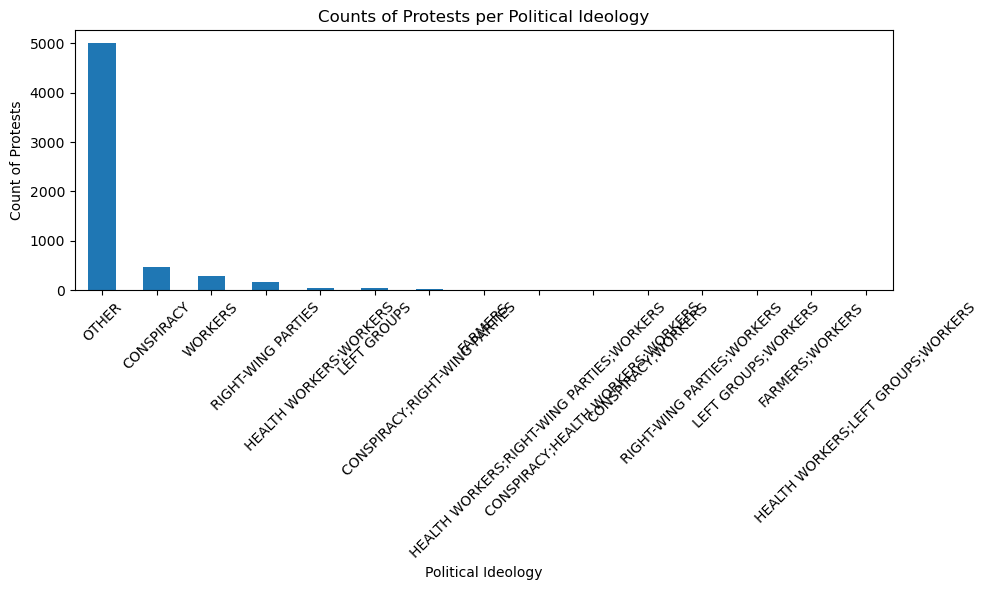

In [23]:
ideology_counts = filtered_df['POLITICAL_IDEOLOGY'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ideology_counts.plot(kind='bar')
plt.xlabel('Political Ideology')
plt.ylabel('Count of Protests')
plt.title('Counts of Protests per Political Ideology')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Other" catgeory is still very big, because many protests do not have an entry in the entry row. So for now I have to go with the clearly identified share of the dataset

As a next step, I wnat to filter for only the Quedernker movement and their allies

In [24]:
#I filter the df for only the Querdenker movement

right_df = filtered_df[filtered_df['POLITICAL_IDEOLOGY'].str.contains('CONSPIRACY|RIGHT-WING PARTIES', case=False)]

print(right_df)

      EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION   DISORDER_TYPE  \
2605        AUT1621 2023-10-14  2023               1  Demonstrations   
2607        AUT1440 2023-04-15  2023               1  Demonstrations   
2610        AUT1303 2023-01-21  2023               1  Demonstrations   
2612        AUT1265 2022-12-04  2022               1  Demonstrations   
2614        AUT1180 2022-09-10  2022               1  Demonstrations   
...             ...        ...   ...             ...             ...   
23676       DEU1291 2020-05-01  2020               1  Demonstrations   
23703       DEU1256 2020-04-29  2020               1  Demonstrations   
23705       DEU1250 2020-04-27  2020               1  Demonstrations   
23727       DEU1218 2020-04-25  2020               1  Demonstrations   
23744       DEU1177 2020-04-22  2020               1  Demonstrations   

      EVENT_TYPE    SUB_EVENT_TYPE                ACTOR1  \
2605    Protests  Peaceful protest  Protesters (Austria)   
2607    Protest

To do it more properly and not forget abou any actors, I will make use of the resulting list from my network analysis of Querdenker and allies to build a filter:

In [25]:
# Handle missing values in 'actor1' column
filtered_df['ASSOC_ACTOR_1'] = filtered_df['ASSOC_ACTOR_1'].fillna('')
# Iterate through the original DataFrame and check if each actor is present in 'actor1'
filtered_df['querdenker'] = filtered_df['ASSOC_ACTOR_1'].apply(lambda x: any(actor in x for actor in all_actors_in_subgraph))

querdenker_true_df = filtered_df[filtered_df['querdenker']]

# Display the filtered DataFrame
print(querdenker_true_df)

      EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION   DISORDER_TYPE  \
2605        AUT1621 2023-10-14  2023               1  Demonstrations   
2607        AUT1440 2023-04-15  2023               1  Demonstrations   
2610        AUT1303 2023-01-21  2023               1  Demonstrations   
2612        AUT1265 2022-12-04  2022               1  Demonstrations   
2614        AUT1180 2022-09-10  2022               1  Demonstrations   
...             ...        ...   ...             ...             ...   
23705       DEU1250 2020-04-27  2020               1  Demonstrations   
23727       DEU1218 2020-04-25  2020               1  Demonstrations   
23744       DEU1177 2020-04-22  2020               1  Demonstrations   
23775       DEU1112 2020-04-09  2020               1  Demonstrations   
23785       DEU1075 2020-03-28  2020               1  Demonstrations   

      EVENT_TYPE    SUB_EVENT_TYPE                ACTOR1  \
2605    Protests  Peaceful protest  Protesters (Austria)   
2607    Protest

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\3641195465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ASSOC_ACTOR_1'] = filtered_df['ASSOC_ACTOR_1'].fillna('')
C:\Users\fried\AppData\Local\Temp\ipykernel_30028\3641195465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['querdenker'] = filtered_df['ASSOC_ACTOR_1'].apply(lambda x: any(actor in x for actor in all_actors_in_subgraph))


Now, i will take care of the second step of my analysis.
The plan was to show the frequency of the protests over time for both countries for the Quedernken movement and their allies:

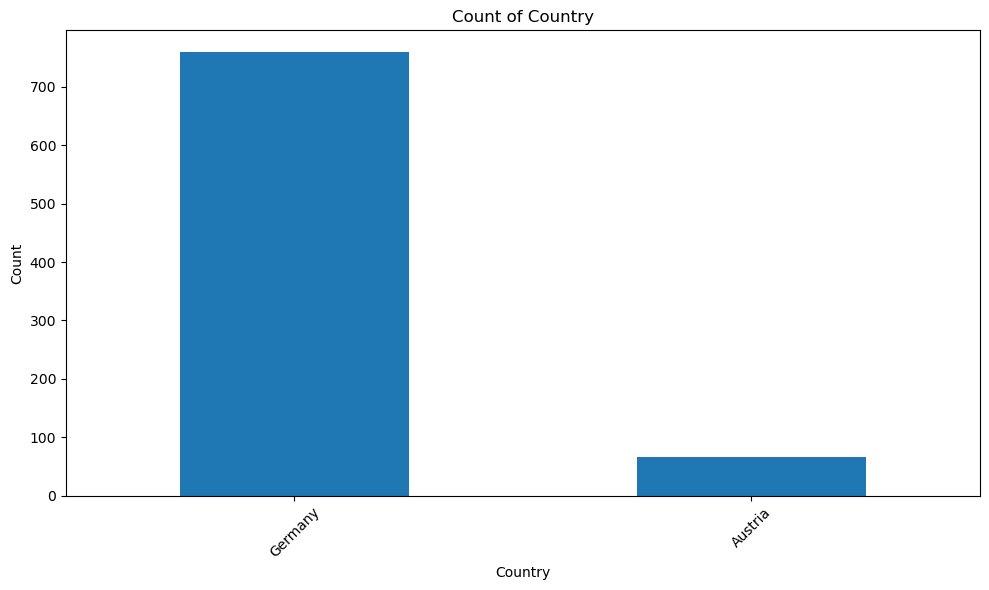

In [26]:
#---------overview of country counts
actor_counts = querdenker_true_df['COUNTRY'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
actor_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

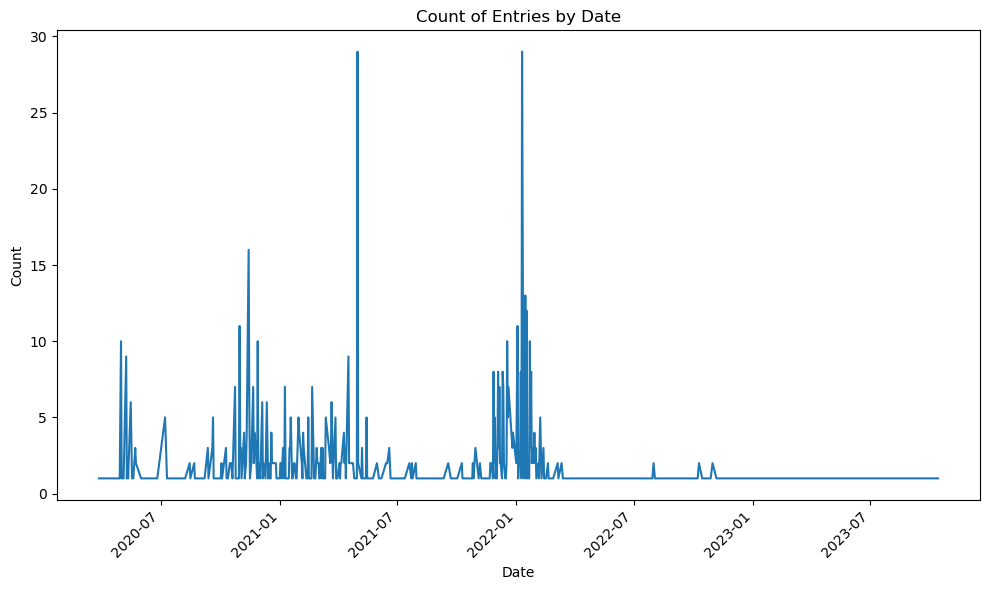

In [27]:
#--------------no i will sort for time:
date_counts = querdenker_true_df['EVENT_DATE'].value_counts().sort_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))  
date_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries by Date')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

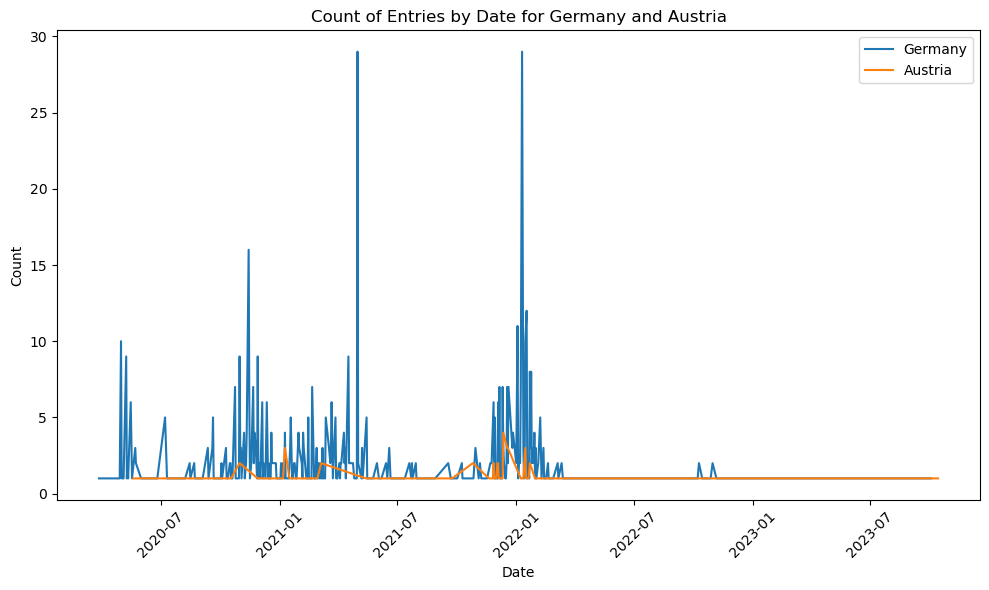

In [28]:
#-------------------for both countries respectively
germany_data = querdenker_true_df[querdenker_true_df['COUNTRY'] == 'Germany']
austria_data = querdenker_true_df[querdenker_true_df['COUNTRY'] == 'Austria']

# Count occurrences for each country by date
germany_counts = germany_data['EVENT_DATE'].value_counts().sort_index()
austria_counts = austria_data['EVENT_DATE'].value_counts().sort_index()

plt.figure(figsize=(10, 6)) 

# Germany line plot
plt.plot(germany_counts.index, germany_counts.values, linestyle='-', label='Germany')

# Austria line plot
plt.plot(austria_counts.index, austria_counts.values, linestyle='-', label='Austria')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries by Date for Germany and Austria')
plt.xticks(rotation=45) 
plt.legend() 
plt.tight_layout()
plt.show()

Something is wrong with the Austria data, but so far I could not find ou what

I order to validate the dataset, it would be interesting to compare the time series with the actual data on the covid restrictions. As an indicator for this I will use the incidence numbers of covid from the last years in Germany. I got the dataset from the WHO

In [56]:
#read in the csv data in a pandas dataframe
#these data are to bbig to be uploaded in github. si i saved them locally.
file_path = '../../../covid_de.csv'
dfcovid = pd.read_csv(file_path)

In [25]:
print(dfcovid.head(10))

                state              county age_group gender        date  cases  \
0  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-03-27      1   
1  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-03-28      1   
2  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-04-03      1   
3  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-10-18      1   
4  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-10-22      1   
5  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-10-27      1   
6  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-10-30      3   
7  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-11-03      1   
8  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-11-07      1   
9  Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-11-10      1   

   deaths  recovered  
0       0          1  
1       0          1  
2       0          1  
3       0       

In [26]:
print(dfcovid.columns)

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')


In [57]:
# Grouping and aggregating data by 'date' while summing 'cases'
binned_data = dfcovid.groupby('date')['cases'].sum()
print(binned_data)
type(binned_data)

date
2020-01-02        1
2020-01-23        1
2020-01-28        2
2020-01-29        2
2020-01-31        4
              ...  
2023-01-29     1566
2023-01-30    18028
2023-01-31    19968
2023-02-01    15201
2023-02-02     9408
Name: cases, Length: 1094, dtype: int64


pandas.core.series.Series

In [58]:
df_from_series = binned_data.reset_index()
print(df_from_series)

            date  cases
0     2020-01-02      1
1     2020-01-23      1
2     2020-01-28      2
3     2020-01-29      2
4     2020-01-31      4
...          ...    ...
1089  2023-01-29   1566
1090  2023-01-30  18028
1091  2023-01-31  19968
1092  2023-02-01  15201
1093  2023-02-02   9408

[1094 rows x 2 columns]


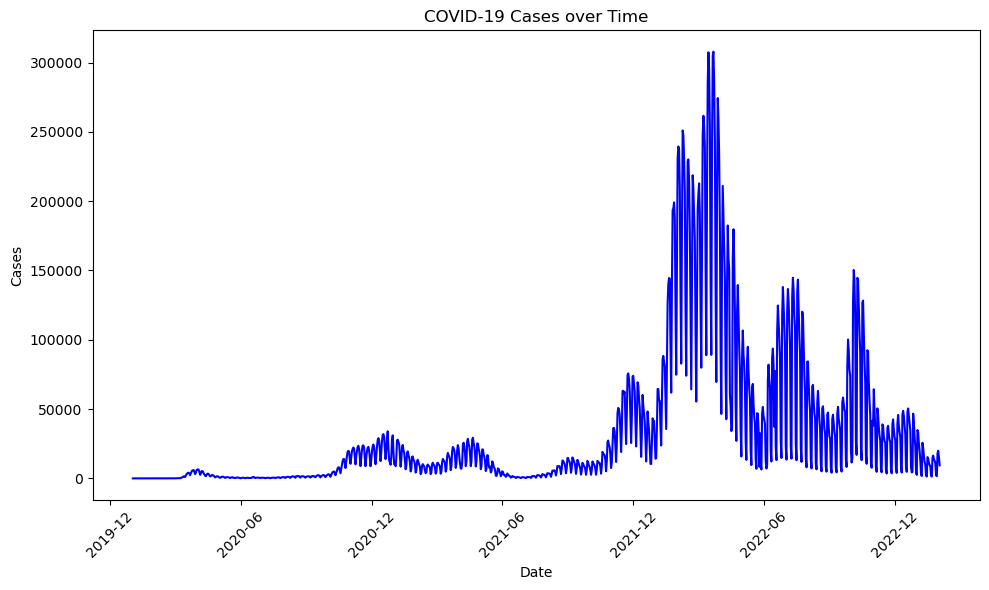

In [59]:
#--------show developement of covid incidences over time


import matplotlib.dates as mdates
df_from_series['date'] = pd.to_datetime(df_from_series['date'])
plt.figure(figsize=(10, 6))
plt.plot(df_from_series['date'], df_from_series['cases'], linestyle='-', marker='', color='blue')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases over Time')

# Set x-axis ticks to show every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

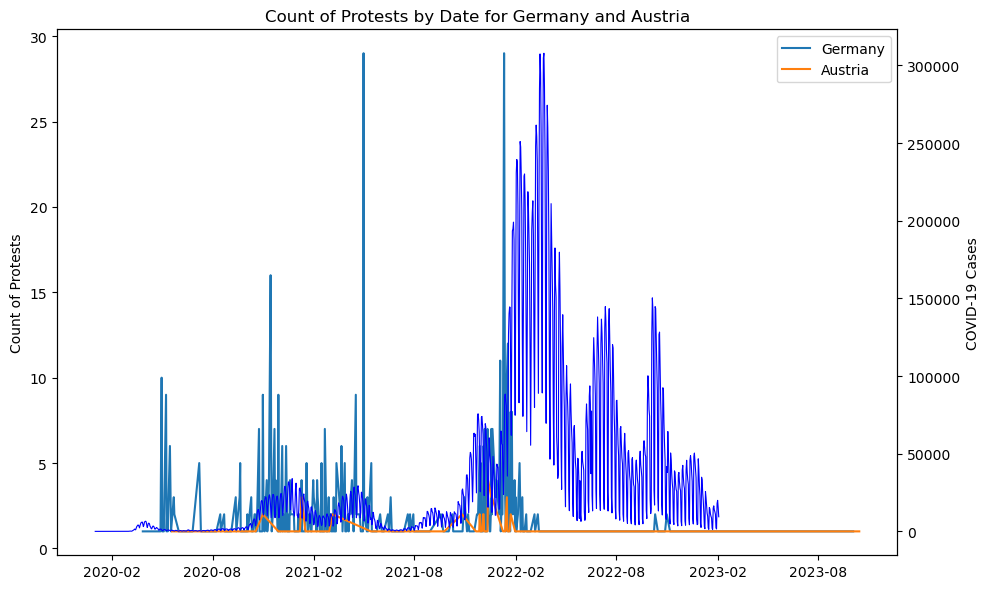

In [172]:
#now I will plot both, the covid acses and the protests in one graph to see
#whether there is a recation pattern to be seen:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting counts for Germany and Austria
ax1.plot(germany_counts.index, germany_counts.values, linestyle='-', label='Germany')
ax1.plot(austria_counts.index, austria_counts.values, linestyle='-', label='Austria')
ax1.set_ylabel('Count of Protests')
ax1.set_title('Count of Protests by Date for Germany and Austria')
ax1.legend()

# Create a twin axis for plotting COVID-19 cases
ax2 = ax1.twinx()  # Share the same x-axis

# Convert 'date' column to datetime format
df_from_series['date'] = pd.to_datetime(df_from_series['date'])

# Plotting COVID-19 cases over time on the second axis
ax2.plot(df_from_series['date'], df_from_series['cases'], linestyle='-', marker='', color='blue', linewidth=0.8)

ax2.set_ylabel('COVID-19 Cases')

# Set x-axis format
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Analysis: we can see in the plot that: the first wave of protests clearly starts after the first corona cases. In summer, the corona cases as well as the protest counts flatten. the next wave of protests starts in autumn which corresponds with the notion of the tightening restictions and lockdowns in that time. In Summer 2021, we again see a flattening of boths, Covid cases and protests. An again a rise in winter, especially peaking during the time of the first vaccinations (anti vacc movements). Why the protests almost stop from Spring 2022, even thpugh the cases are peaking, is most likely due to continous loosening of the restricions.

As a last step of data exploration, I want to plot the demonstrations on a map

In [33]:
#now to the maps with geopandas

import geopandas as gpd
from shapely.geometry import Point

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\1257723579.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


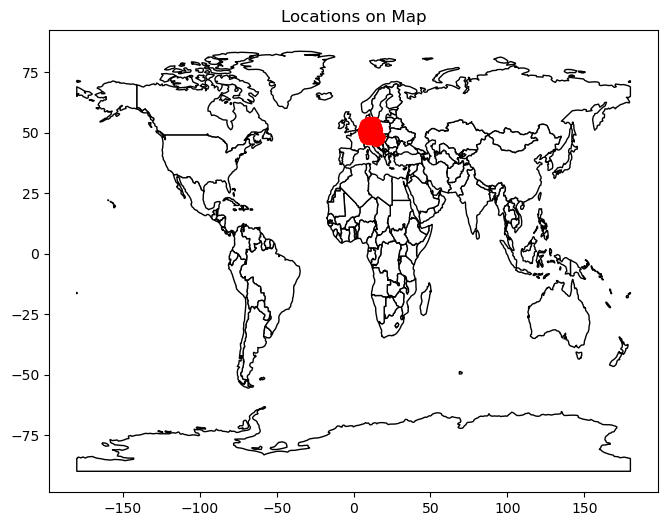

In [34]:
#---------create a map
geometry = [Point(xy) for xy in zip(querdenker_true_df['LONGITUDE'], querdenker_true_df['LATITUDE'])]
gdf = gpd.GeoDataFrame(querdenker_true_df, geometry=geometry, crs='EPSG:4326')

#------that should be a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=50)
plt.title('Locations on Map')
plt.show()

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\4254238890.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


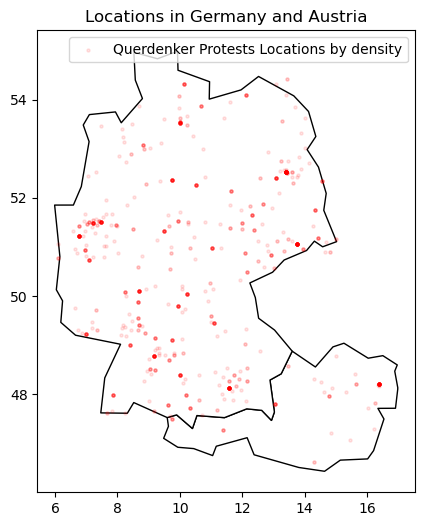

In [71]:
geometry = [Point(xy) for xy in zip(querdenker_true_df['LONGITUDE'], querdenker_true_df['LATITUDE'])]
gdf = gpd.GeoDataFrame(querdenker_true_df, geometry=geometry, crs='EPSG:4326')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany_austria = world[(world['name'] == 'Germany') | (world['name'] == 'Austria')]

# Plotting only Germany and Austria on the map
ax = germany_austria.plot(color='white', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.1, label='Querdenker Protests Locations by density')
# Adding legend
ax.legend()
plt.title('Locations in Germany and Austria')
plt.show()

First Analysis: we see a hotspot of protests of course in the bigger cities. But also in smaller ones, which I will explore in next steps. In Baden-Würtemberg there is a certain density to be recognised (the Querdenker Movement formed there). There is no visible differnce between former east and west Germany (which is against the narrative that the Querdenker movement is especially strong in the east). For Austria there are consideralbly fewer protests noted down than for Germany.

Now, I want to add the crowdsize to do a more correct analysis. To do that I have to first transform the textual data of the size column of the dataset. 

In [66]:
#converting the crowd size description into a count column: 

import numpy as np

# Extract numeric value from 'TAGS' column and replace commas with an empty string
querdenker_true_df['count_cleaned'] = querdenker_true_df['TAGS'].str.extract(r'(\d+,\d+|\d+)').replace(',', '', regex=True)

# Convert the 'count_cleaned' column to numeric
querdenker_true_df['count_cleaned'] = pd.to_numeric(querdenker_true_df['count_cleaned'], errors='coerce')

# Use np.where to handle conditions and NaN values more gracefully
querdenker_true_df['count_cleaned'] = np.where(querdenker_true_df['TAGS'].str.contains('hundred', case=False), 100, querdenker_true_df['count_cleaned'])
querdenker_true_df['count_cleaned'] = np.where(querdenker_true_df['TAGS'].str.contains('hundreds', case=False), 300, querdenker_true_df['count_cleaned'])
querdenker_true_df['count_cleaned'] = np.where(querdenker_true_df['TAGS'].str.contains('thousand', case=False), 1000, querdenker_true_df['count_cleaned'])
querdenker_true_df['count_cleaned'] = np.where(querdenker_true_df['TAGS'].str.contains('thousands', case=False), 3000, querdenker_true_df['count_cleaned'])
querdenker_true_df['count_cleaned'] = np.where(querdenker_true_df['TAGS'].str.contains('group', case=False), 10, querdenker_true_df['count_cleaned'])

# Handle the case for expression "between 200 and 2000"
expression_between_200_2000 = querdenker_true_df['TAGS'].str.extract(r'between (\d+) and (\d+)')

# Check if there are values between 200 and 2000
valid_between_200_2000 = expression_between_200_2000.notna().all(axis=1)
querdenker_true_df.loc[valid_between_200_2000, 'count_cleaned'] = (
    expression_between_200_2000[valid_between_200_2000].astype(float).sum(axis=1) / 2
)

print(querdenker_true_df)

      EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION   DISORDER_TYPE  \
2605        AUT1621 2023-10-14  2023               1  Demonstrations   
2607        AUT1440 2023-04-15  2023               1  Demonstrations   
2610        AUT1303 2023-01-21  2023               1  Demonstrations   
2612        AUT1265 2022-12-04  2022               1  Demonstrations   
2614        AUT1180 2022-09-10  2022               1  Demonstrations   
...             ...        ...   ...             ...             ...   
23705       DEU1250 2020-04-27  2020               1  Demonstrations   
23727       DEU1218 2020-04-25  2020               1  Demonstrations   
23744       DEU1177 2020-04-22  2020               1  Demonstrations   
23775       DEU1112 2020-04-09  2020               1  Demonstrations   
23785       DEU1075 2020-03-28  2020               1  Demonstrations   

      EVENT_TYPE    SUB_EVENT_TYPE                ACTOR1  \
2605    Protests  Peaceful protest  Protesters (Austria)   
2607    Protest

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\3245382383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  querdenker_true_df['count_cleaned'] = querdenker_true_df['TAGS'].str.extract(r'(\d+,\d+|\d+)').replace(',', '', regex=True)
C:\Users\fried\AppData\Local\Temp\ipykernel_30028\3245382383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  querdenker_true_df['count_cleaned'] = pd.to_numeric(querdenker_true_df['count_cleaned'], errors='coerce')
C:\Users\fried\AppData\Local\Temp\ipykernel_30028\324538

In [46]:
#do some qgis specific cleaning for another seminar
querdenker_true_df['LOCATION'] = querdenker_true_df['LOCATION'].replace('Vienna - Inner City', 'Vienna', regex=False)

# Save the DataFrame to a CSV file to put into QGIS
querdenker_true_df.to_csv('output_file_querdenker_austria_germany.csv', index=False)

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\248993161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  querdenker_true_df['LOCATION'] = querdenker_true_df['LOCATION'].replace('Vienna - Inner City', 'Vienna', regex=False)


C:\Users\fried\AppData\Local\Temp\ipykernel_30028\1926513221.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


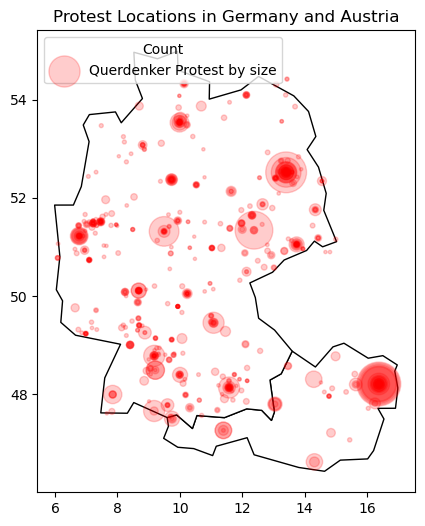

In [78]:
geometry = [Point(xy) for xy in zip(querdenker_true_df['LONGITUDE'], querdenker_true_df['LATITUDE'])]
gdf = gpd.GeoDataFrame(querdenker_true_df, geometry=geometry, crs='EPSG:4326')

# Scale marker sizes based on values in 'count_cleaned'
min_size = 5
max_size = 1000
gdf['marker_size'] = min_size + (max_size - min_size) * (gdf['count_cleaned'] / gdf['count_cleaned'].max())

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany_austria = world[(world['name'] == 'Germany') | (world['name'] == 'Austria')]

# Plotting Germany and Austria with country boundaries
ax = germany_austria.plot(color='white', edgecolor='black', figsize=(10, 6))

# Plotting points from GeoDataFrame with adjusted marker size
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['marker_size'], alpha=0.2, label='Querdenker Protest by size')

# Adding legend
ax.legend(title='Count', loc='upper left')

plt.title('Protest Locations in Germany and Austria')
plt.show()

No I will plot over time

C:\Users\fried\AppData\Local\Temp\ipykernel_30028\2112113703.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


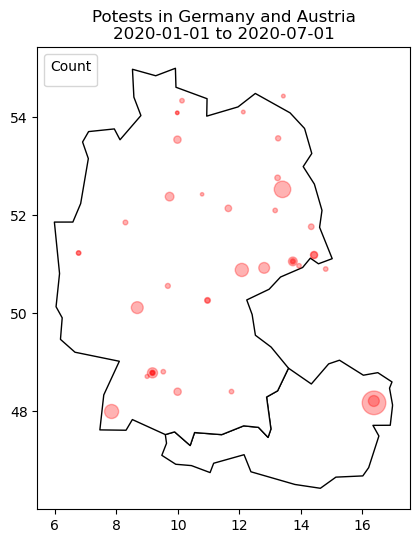

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


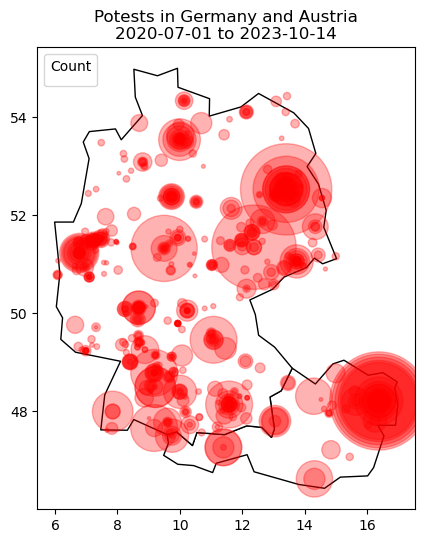

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


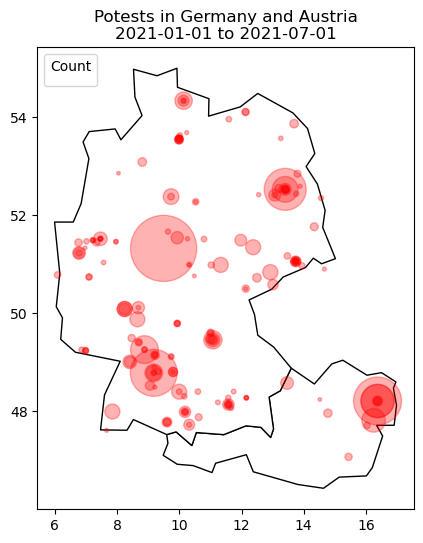

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


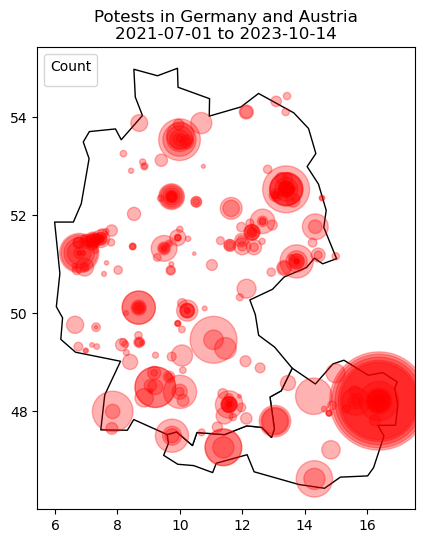

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


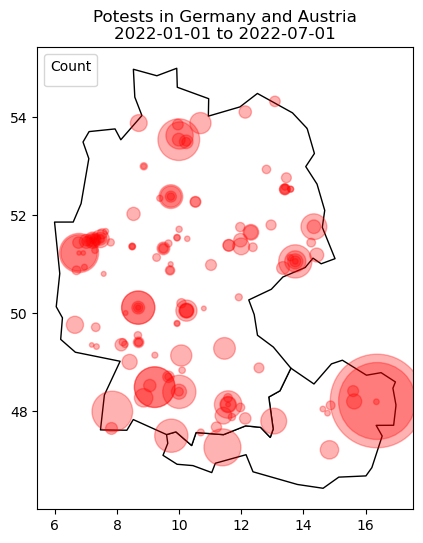

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


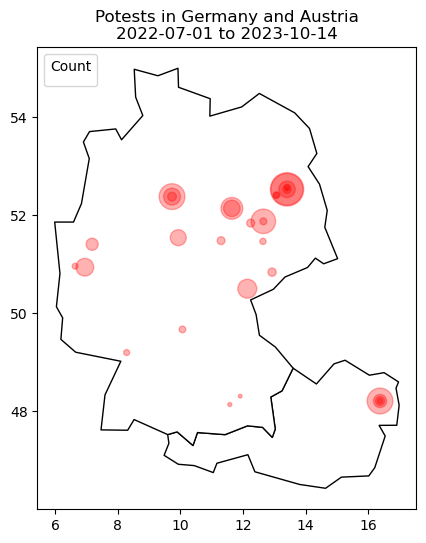

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


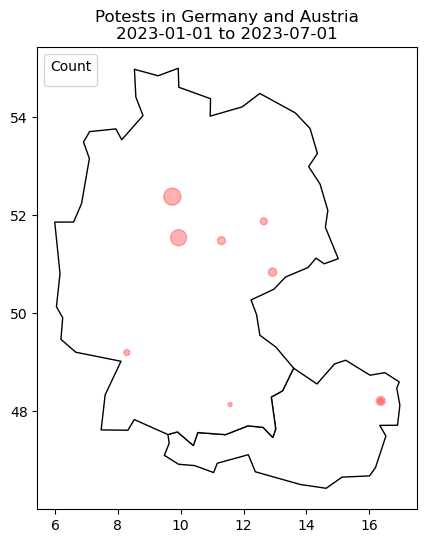

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


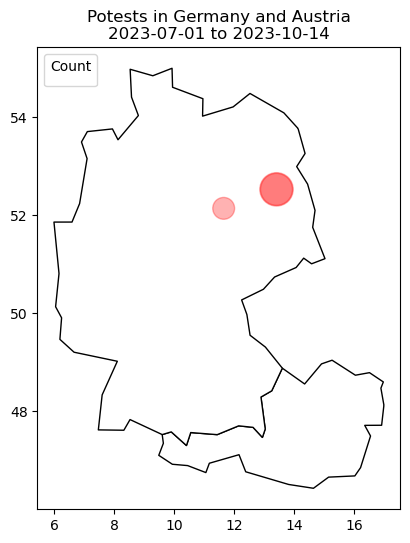

In [99]:

# plotting over time
geometry = [Point(xy) for xy in zip(querdenker_true_df['LONGITUDE'], querdenker_true_df['LATITUDE'])]
gdf = gpd.GeoDataFrame(querdenker_true_df, geometry=geometry, crs='EPSG:4326')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany_austria = world[(world['name'] == 'Germany') | (world['name'] == 'Austria')]

# Scale marker sizes based on values in 'count_cleaned'
min_size = 5
max_size = 5000
gdf['marker_size'] = min_size + (max_size - min_size) * (gdf['count_cleaned'] / gdf['count_cleaned'].max())

# Convert the 'DATE' column to datetime format
gdf['EVENT_DATE'] = pd.to_datetime(gdf['EVENT_DATE'], format='%Y-%m-%d')

# Create maps for each six-month interval within a year
for year in range(2020, 2024):
    for month_interval in range(1, 13, 6):
        start_date = pd.to_datetime(f'{year}-{month_interval:02d}-01')
        end_date = pd.to_datetime(f'{year}-{month_interval + 6:02d}-01') if month_interval + 6 <= 12 else gdf['EVENT_DATE'].max()

        # Filter DataFrame for the current six-month interval
        interval_df = gdf[(gdf['EVENT_DATE'] >= start_date) & (gdf['EVENT_DATE'] < end_date)]

        # Plotting Germany and Austria with country boundaries
        fig, ax = plt.subplots(figsize=(10, 6))
        germany_austria.plot(ax=ax, color='white', edgecolor='black')

        # Plotting points from GeoDataFrame with adjusted marker size
        interval_df.plot(ax=ax, marker='o', color='red', markersize=interval_df['marker_size'], alpha=0.3)

        # Adding legend
        ax.legend(title='Count', loc='upper left')

        plt.title(f'Potests in Germany and Austria\n{start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')
        plt.show()


For further Analysis see repo QGIS folder

For continious research, I plan to work further with the ACLED data in oder to elaborate on the question: Are the right wing protests traveling on the "same paths" as previous right wing movements such as the Pegida movement?

Even though I lack the time to work further on that question, I will briefly map out my strategy here:
1. get the data from ACLED protests from October 2014 to 2015 for Germany. Filter the data in which the Actor is indicated as Pegida.
2. Map the protests on a map too.
3. Compare the patterns of protest locations from the Querdenker Protests and the Pegida Protest locations.
4. Use the column of the ACLED dataset: Compare Actors and People mentioned.
